### aim: Create a pipeline for our global carbon budget submissions

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}
import breakdown as bd


plt.rc('font', **font)

Tier 1: Minimum request:
Variable Name Units Output
frequency
Shape Priority Long name
Surface ocean or 2D properties
fgco2_glob Pg C yr-1 monthly T 1 Globally integrated air-sea CO2 flux
(positive downward)
fgco2_reg Pg C yr-1 monthly iT 1 Regionally integrated air-sea CO2 flux
(positive downward) (using regional
bounds), i: number of regions
intDIC_1994_glo
b
PgC 1 Globally integrated DIC inventory in
the year 1994 (average over 1994)
intDIC_1994_re
g
PgC i 1 Regionally integrated DIC inventory in
the year 1994 (average over 1994)
intDIC_2007_glo
b
PgC 1 Globally integrated DIC inventory in
the year 2007 (average over 2007)
intDIC_2007_re
g
PgC i 1 Regionally integrated DIC inventory in
the year 2007 (average over 2007)
fgco2 mol m-2 s-1 monthly XYT 1 Flux density of the total air-sea CO2
exchange (positive downward)
sfco2 µatm monthly XYT 1 Surface ocean CO2 fugacity (fCO2)
fice - monthly XYT 1 fractional ice-cover (=sea-ice
concentration) used for the
computation of the air-sea exchange
flux [0-1]
dissicos mol m-3 monthly XYT 1 sea-surface DIC
talkos mol m-3 monthly XYT 1 sea-surface Alkalinity
tos degC monthly XYT 1 sea-surface temp
sos - monthly XYT 1 sea-surface salinity (PSS-78)
intdic mol m-2 monthly XYT 1 vertically-integrated DIC
A

fco2_glob (T)
fcot_reg (iT)
intDIC_

In [5]:
run = False
if run:
    help(bd.get_cflx)

run2 = False
if run2:
    
    tmin = 1948; tmax = 1982; 
    
#     tr = 'TOM12_TJ_DGA1'
    baseDir = '/gpfs/data/greenocean/software/runs/'
    sdir = '/gpfs/home/mep22dku/scratch/SOZONE/GRO2_FORCING_EXPERIMENT/GCB_pipeline/extracted/'
#     fnam = f'{tr}_yearly_cflx.nc'
#     bd.get_cflx(tmin, tmax, tr, baseDir, sdir, fnam, verbose=False)
    
#     tr = 'TOM12_TJ_DGB1'
#     fnam = f'{tr}_yearly_cflx.nc'
#     bd.get_cflx(tmin, tmax, tr, baseDir, sdir, fnam, verbose=False)
    
#     tr = 'TOM12_TJ_DGC1'
#     fnam = f'{tr}_yearly_cflx.nc'
#     bd.get_cflx(tmin, tmax, tr, baseDir, sdir, fnam, verbose=False)
    
#     tr = 'TOM12_DW_GA01'
#     fnam = f'{tr}_yearly_cflx.nc'
#     bd.get_cflx(tmin, tmax, tr, baseDir, sdir, fnam, verbose=False)

#     tr = 'TOM12_DW_GB01'
#     fnam = f'{tr}_yearly_cflx.nc'
#     bd.get_cflx(tmin, tmax, tr, baseDir, sdir, fnam, verbose=False)


#     tr = 'TOM12_DW_GC01'
#     fnam = f'{tr}_yearly_cflx.nc'
#     bd.get_cflx(tmin, tmax, tr, baseDir, sdir, fnam, verbose=False)


#     tr = 'TOM12_DW_GD01'
#     fnam = f'{tr}_yearly_cflx.nc'
#     bd.get_cflx(tmin, tmax, tr, baseDir, sdir, fnam, verbose=False)


    
    tr = 'TOM12_TJ_DGD1'
    fnam = f'{tr}_yearly_cflx.nc'
    bd.get_cflx(tmin, tmax, tr, baseDir, sdir, fnam, verbose=False)

In [16]:
DW_GC01 = xr.open_dataset('./extracted/TOM12_DW_GC01_yearly_cflx.nc')
DW_GD01 = xr.open_dataset('./extracted/TOM12_DW_GD01_yearly_cflx.nc')
DW_GA01 = xr.open_dataset('./extracted/TOM12_DW_GA01_yearly_cflx.nc')
DW_GB01 = xr.open_dataset('./extracted/TOM12_DW_GB01_yearly_cflx.nc')

TJ_DGC1 = xr.open_dataset('./extracted/TOM12_TJ_DGC1_yearly_cflx.nc')
TJ_DGA1 = xr.open_dataset('./extracted/TOM12_TJ_DGA1_yearly_cflx.nc')
TJ_DGB1 = xr.open_dataset('./extracted/TOM12_TJ_DGB1_yearly_cflx.nc')
TJ_DGD1 = xr.open_dataset('./extracted/TOM12_TJ_DGD1_yearly_cflx.nc')


In [17]:
TJ_DGB1

<xarray.Dataset>
Dimensions:  (time: 73)
Coordinates:
    yrs      (time) int64 ...
Dimensions without coordinates: time
Data variables:
    cflx     (time) float64 ...
    cflx_so  (time) float64 ...
    pco2     (time) float64 ...
    pco2_so  (time) float64 ...
Attributes:
    description:  model analytics

In [8]:
TJ_DGB1

<xarray.Dataset>
Dimensions:  (time: 73)
Coordinates:
    yrs      (time) int64 1948 1949 1950 1951 1952 ... 2016 2017 2018 2019 2020
Dimensions without coordinates: time
Data variables:
    cflx     (time) float64 -8.099 -3.875 -3.651 -3.98 ... 0.3479 0.3604 0.3171
    cflx_so  (time) float64 -1.03 -0.6308 -0.8528 ... -0.3233 -0.3186 -0.32
    pco2     (time) float64 314.6 289.8 288.5 289.3 ... 269.1 269.0 268.8 269.0
    pco2_so  (time) float64 302.5 289.2 295.5 305.2 ... 284.2 284.2 284.1 284.1
Attributes:
    description:  model analytics

In [9]:
TJ_DGD1

<xarray.Dataset>
Dimensions:  (time: 35)
Coordinates:
    yrs      (time) int64 ...
Dimensions without coordinates: time
Data variables:
    cflx     (time) float64 ...
    cflx_so  (time) float64 ...
    pco2     (time) float64 ...
    pco2_so  (time) float64 ...
Attributes:
    description:  model analytics

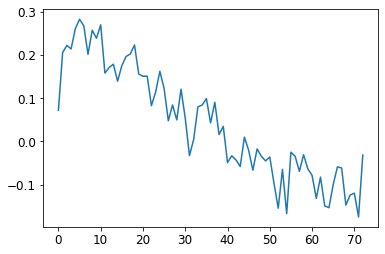

In [21]:
difference_dave_so = DW_GA01.cflx_so - DW_GC01.cflx_so
plt.plot(difference_dave_so)

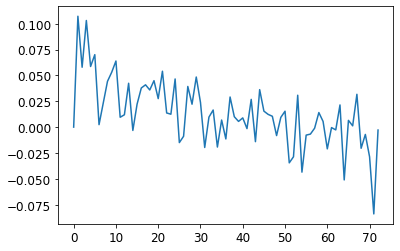

In [22]:
difference_so = TJ_DGA1.cflx_so - TJ_DGC1.cflx_so

plt.plot(difference_so)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


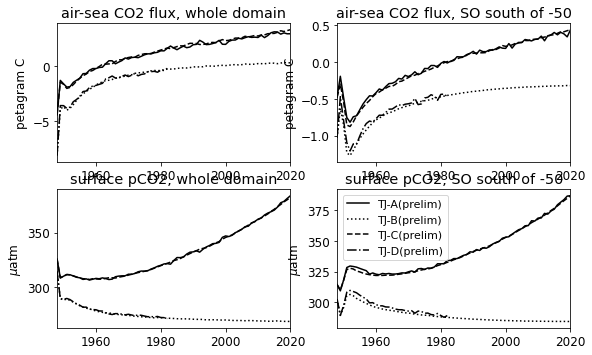

In [13]:
dsets = [TJ_DGA1, TJ_DGB1, TJ_DGC1 ,TJ_DGD1,]
cols = ['k','k','k','k']
descs = [
         'TJ-A(prelim)','TJ-B(prelim)','TJ-C(prelim)','TJ-D(prelim)',]
ls = ['-',':','--','-.',\
      '-',':','--','-.']

fact = 0.4
fig, axs = plt.subplots(2,2, figsize=(23*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

### cflx total
for i in range(0,len(dsets)):
    ds = dsets[i]; col = cols[i]
    axs[0].plot(ds.yrs, ds.cflx, color = col, label = descs[i], linestyle = ls[i])
    axs[1].plot(ds.yrs, ds.cflx_so, color = col, linestyle = ls[i])
    axs[2].plot(ds.yrs, ds.pco2, color = col, linestyle = ls[i])
    axs[3].plot(ds.yrs, ds.pco2_so, color = col, label = descs[i], linestyle = ls[i])

    tits = ['air-sea CO2 flux, whole domain', 'air-sea CO2 flux, SO south of -50',\
        'surface pCO2, whole domain', 'surface pCO2, SO south of -50']
    ylabs = ['petagram C', 'petagram C', '$\mu$atm', '$\mu$atm']
    
    for i in range(0,4):
        axs[i].grid()
        axs[i].set_xlim(1948,2020)
        axs[i].set_title(tits[i])
        axs[i].set_ylabel(ylabs[i])

#     axs[2].set_ylim([280,tendatm])
#     axs[3].set_ylim([280,tendatm])

    axs[3].legend(loc = 'best', fontsize = 11)

In [ ]:
dsets = [
         TJ_DGA1, TJ_DGB1, TJ_DGC1, TJ_DGD1,]
cols = ['k','k','k','k']
descs = [
         'TJ-A(prelim)','TJ-B(prelim)','TJ-C(prelim)','TJ-D(prelim)',]
ls = ['-',':','--','-.',\
      '-',':','--','-.']

fact = 0.4
fig, axs = plt.subplots(2,2, figsize=(23*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

### cflx total
for i in range(0,len(dsets)):
    ds = dsets[i]; col = cols[i]
    axs[0].plot(ds.yrs, ds.cflx, color = col, label = descs[i], linestyle = ls[i])
    axs[1].plot(ds.yrs, ds.cflx_so, color = col, linestyle = ls[i])
    axs[2].plot(ds.yrs, ds.pco2, color = col, linestyle = ls[i])
    axs[3].plot(ds.yrs, ds.pco2_so, color = col, label = descs[i], linestyle = ls[i])

    tits = ['air-sea CO2 flux, whole domain', 'air-sea CO2 flux, SO south of -50',\
        'surface pCO2, whole domain', 'surface pCO2, SO south of -50']
    ylabs = ['petagram C', 'petagram C', '$\mu$atm', '$\mu$atm']
    
    for i in range(0,4):
        axs[i].grid()
        axs[i].set_xlim(1948,2020)
        axs[i].set_title(tits[i])
        axs[i].set_ylabel(ylabs[i])

#     axs[2].set_ylim([280,tendatm])
#     axs[3].set_ylim([280,tendatm])

    axs[3].legend(loc = 'best', fontsize = 11)

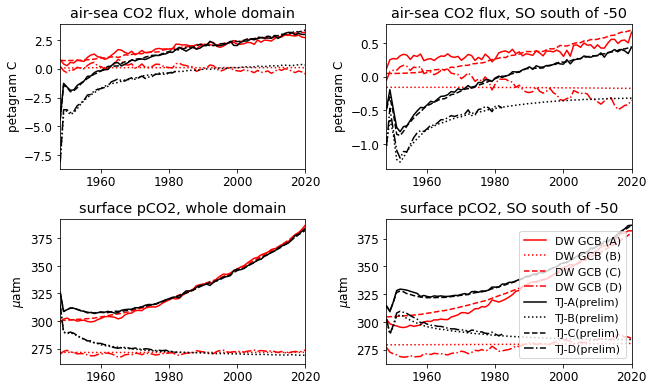

In [14]:
dsets = [DW_GA01, DW_GB01, DW_GC01, DW_GD01,\
         TJ_DGA1, TJ_DGB1, TJ_DGC1, TJ_DGD1]
cols = ['r','r','r','r','k','k','k','k']
descs = ['DW GCB (A)','DW GCB (B)','DW GCB (C)','DW GCB (D)',\
         'TJ-A(prelim)','TJ-B(prelim)','TJ-C(prelim)','TJ-D(prelim)',]
ls = ['-',':','--','-.',\
      '-',':','--','-.']

fact = 0.4
fig, axs = plt.subplots(2,2, figsize=(23*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

### cflx total
for i in range(0,len(dsets)):
    ds = dsets[i]; col = cols[i]
    axs[0].plot(ds.yrs, ds.cflx, color = col, label = descs[i], linestyle = ls[i])
    axs[1].plot(ds.yrs, ds.cflx_so, color = col, linestyle = ls[i])
    axs[2].plot(ds.yrs, ds.pco2, color = col, linestyle = ls[i])
    axs[3].plot(ds.yrs, ds.pco2_so, color = col, label = descs[i], linestyle = ls[i])

    tits = ['air-sea CO2 flux, whole domain', 'air-sea CO2 flux, SO south of -50',\
        'surface pCO2, whole domain', 'surface pCO2, SO south of -50']
    ylabs = ['petagram C', 'petagram C', '$\mu$atm', '$\mu$atm']
    
    for i in range(0,4):
        axs[i].grid()
        axs[i].set_xlim(1948,2020)
        axs[i].set_title(tits[i])
        axs[i].set_ylabel(ylabs[i])

#     axs[2].set_ylim([280,tendatm])
#     axs[3].set_ylim([280,tendatm])

    axs[3].legend(loc = 'best', fontsize = 11)
    
plt.tight_layout()